### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

### Scraping Data

In [2]:
data = yf.download("HBAR-USD", start="2019-09-17", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-17,0.416009,0.416009,0.087753,0.090177,0.090177,10855378
2019-09-18,0.090519,0.100272,0.080045,0.086921,0.086921,14772274
2019-09-19,0.087702,0.087721,0.054469,0.057924,0.057924,27324784
2019-09-20,0.058087,0.059061,0.047800,0.052490,0.052490,15814443
2019-09-21,0.052402,0.055408,0.045456,0.048021,0.048021,13144171


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-26,0.117147,0.130246,0.116938,0.120330,0.120330,163477891
2024-03-27,0.120330,0.121382,0.112298,0.113734,0.113734,108853536
2024-03-28,0.113734,0.117463,0.111356,0.116196,0.116196,64238270
2024-03-29,0.116196,0.117743,0.112648,0.116099,0.116099,54339428
2024-03-30,0.116099,0.116458,0.112933,0.113619,0.113619,44790919


### Data Preprocessing

In [5]:
data = data.reset_index()

In [6]:
data = data.drop(['Date','Adj Close'],axis=1)

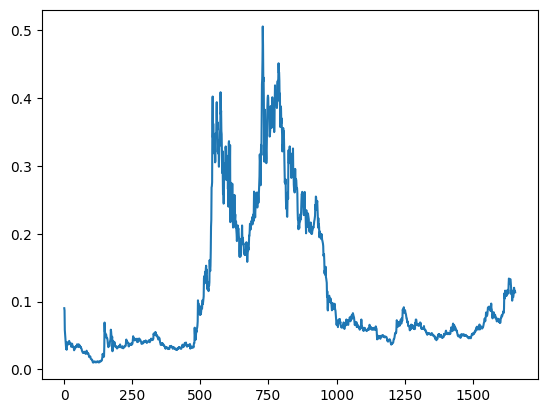

In [7]:
plt.plot(data.Close)

### Moving Averages

In [8]:
# Moving Avg 100 Days
ma100 = data.Close.rolling(100).mean()

In [9]:
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1652    0.093735
1653    0.094078
1654    0.094424
1655    0.094715
1656    0.094939
Name: Close, Length: 1657, dtype: float64

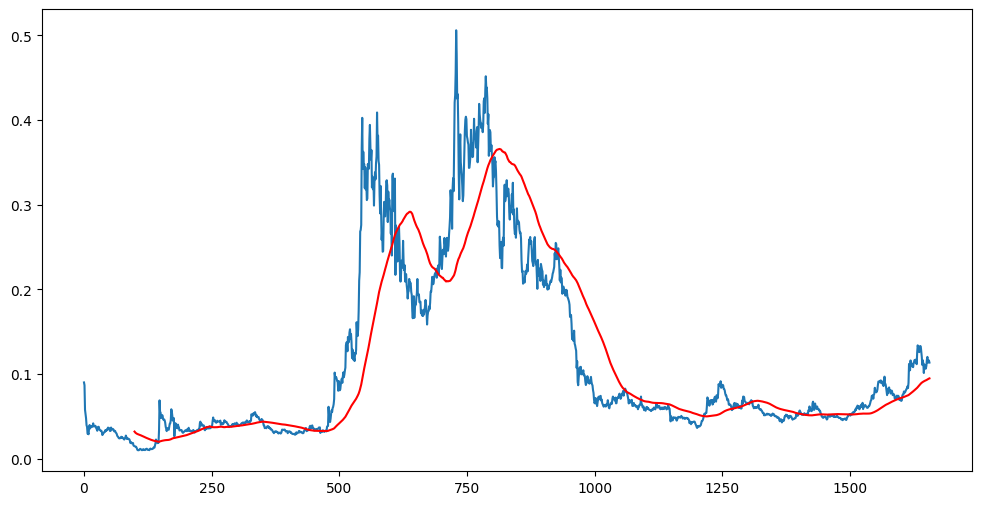

In [10]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')

In [11]:
# Moving Avg 200 Days
ma200 = data.Close.rolling(200).mean()

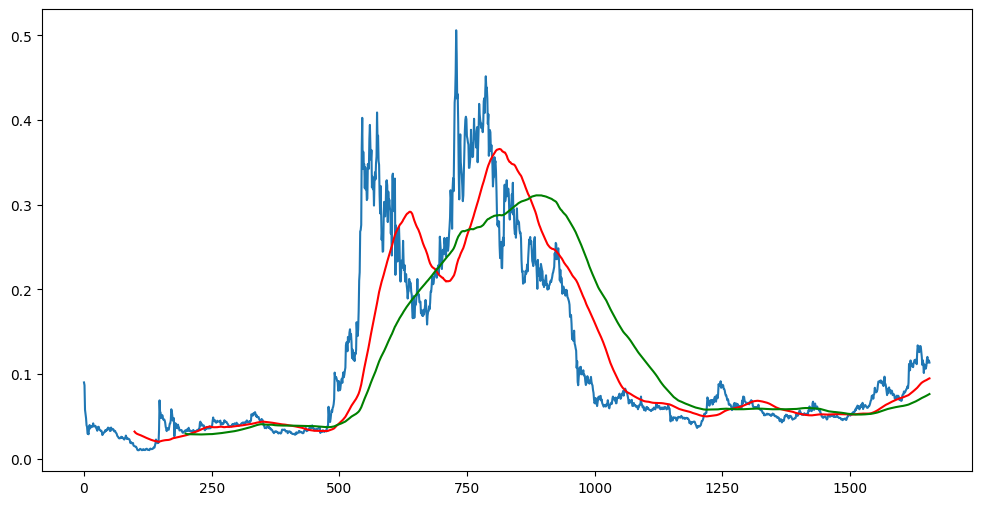

In [12]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
data.shape

(1657, 5)

### Train Test Split

In [14]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [15]:
price = data['Close']

In [39]:
training, testing = train_test_split(price, test_size=0.3, shuffle=False)

In [41]:
print(len(training))
print(len(testing))

1159
498


### Scale Data

In [42]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [43]:
training_trans = scaler.fit_transform(training.values.reshape(-1, 1))

In [44]:
training_trans

array([[0.16153703],
       [0.15497043],
       [0.09649022],
       ...,
       [0.07670372],
       [0.07740152],
       [0.07728656]])

### X,Y Split

In [45]:
x_train = [] # Steps, Features
y_train = [] # Prediction Output

for i in range(100,len(training)):
    x_train.append(training_trans[i-100:i])
    y_train.append(training_trans[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [46]:
x_train.shape

(1059, 100, 1)

### Model Training

In [47]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [48]:
model = Sequential()

# Layer 1
model.add(LSTM(units= 50, activation = 'relu', return_sequences=True,input_shape=(x_train.shape[1],1))) #1 bcz 1 column price
model.add(Dropout(0.2))

# Layer 2
model.add(LSTM(units= 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

# Layer 3
model.add(LSTM(units= 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

# Layer 4
model.add(LSTM(units= 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

E:\PROJECTS - AI\ml-stockprice-prediction-lstm\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape              ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                     │ (None, 100, 50)           │         10,400 │
├───────────────────────────────────┼───────────────────────────┼────────────────┤
│ dropout_4 (Dropout)               │ (None, 100, 50)           │              0 │
├───────────────────────────────────┼───────────────────────────┼────────────────┤
│ lstm_5 (LSTM)                     │ (None, 100, 60)           │         26,640 │
├───────────────────────────────────┼───────────────────────────┼────────────────┤
│ dropout_5 (Dropout)               │ (None, 100, 60)           │              0 │
├───────────────────────────────────┼───────────────────────────┼────────────────┤
│ lstm_6 (LSTM)                     │ (None, 100, 80)           │         45,120 │
├───────────────────────────────────┼───────────────────────────┼────────────────┤
│ dropout_6 (Dropout)               │ (None, 100, 80)           │              0 │
├───────────────────────────────────┼───────────────────────────┼────────────────┤
│ lstm_7 (LSTM)                     │ (None, 120)               │         96,480 │
├───────────────────────────────────┼───────────────────────────┼────────────────┤
│ dropout_7 (Dropout)               │ (None, 120)               │              0 │
├───────────────────────────────────┼───────────────────────────┼────────────────┤
│ dense_1 (Dense)                   │ (None, 1)                 │            121 │
└───────────────────────────────────┴───────────────────────────┴────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - loss: 0.0618
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - loss: 0.0119
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - loss: 0.0110
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - loss: 0.0089
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 165ms/step - loss: 0.0082
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 187ms/step - loss: 0.0081
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - loss: 0.0076
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 177ms/step - loss: 0.0058
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - loss: 0.0066
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - loss: 0.0076
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - loss: 0.0066
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - loss: 0.0059
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - loss: 0.0066
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - loss: 0.0056
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 7s 205ms/step - 

In [51]:
model.save('kerasmodel.h5')

### Create Testing Data

In [54]:
training.tail(100)

1059    0.080932
1060    0.082877
1061    0.081149
1062    0.078958
1063    0.077842
          ...   
1154    0.047194
1155    0.049078
1156    0.048113
1157    0.048459
1158    0.048402
Name: Close, Length: 100, dtype: float64

In [52]:
testing

1159    0.048729
1160    0.046154
1161    0.045090
1162    0.046487
1163    0.048417
          ...   
1652    0.120330
1653    0.113734
1654    0.116196
1655    0.116099
1656    0.113619
Name: Close, Length: 498, dtype: float64

In [55]:
past100days = testing.tail(100)

In [57]:
final_df = pd.concat([past100days, testing], ignore_index=True)

In [58]:
 final_df.head()

0    0.090911
1    0.091231
2    0.090313
3    0.092499
4    0.089798
Name: Close, dtype: float64

In [60]:
final_df.shape

(598,)

In [61]:
training

0       0.090177
1       0.086921
2       0.057924
3       0.052490
4       0.048021
          ...   
1154    0.047194
1155    0.049078
1156    0.048113
1157    0.048459
1158    0.048402
Name: Close, Length: 1159, dtype: float64

In [64]:
input_data = scaler.fit_transform(final_df.values.reshape(-1, 1))

In [65]:
input_data

array([[0.55868662],
       [0.56196809],
       [0.55255443],
       [0.57497081],
       [0.54727336],
       [0.57202772],
       [0.54470969],
       [0.53957218],
       [0.51987328],
       [0.50746527],
       [0.56591601],
       [0.62105457],
       [0.53193258],
       [0.53007647],
       [0.49578537],
       [0.44191845],
       [0.3976497 ],
       [0.46292995],
       [0.42116328],
       [0.48099836],
       [0.49066842],
       [0.44743537],
       [0.4587153 ],
       [0.41670255],
       [0.42413708],
       [0.45250106],
       [0.43655533],
       [0.39773167],
       [0.40117726],
       [0.40939109],
       [0.3999057 ],
       [0.35664186],
       [0.35067371],
       [0.36726557],
       [0.35794421],
       [0.39077916],
       [0.38975369],
       [0.37866859],
       [0.38947681],
       [0.37436165],
       [0.33954757],
       [0.3466027 ],
       [0.33596875],
       [0.33699422],
       [0.32795997],
       [0.3383991 ],
       [0.39483993],
       [0.404

In [67]:
input_data.shape

(598, 1)

In [68]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [72]:
y_test.shape

(498,)

### Making Predictions

In [69]:
y_predicted = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step


In [71]:
y_predicted.shape

(498, 1)

### Scale Up

In [79]:
scale = scaler.scale_

In [80]:
scale[0]

10.254517035740408

In [81]:
scale_factor = 1/scale[0]

In [82]:
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

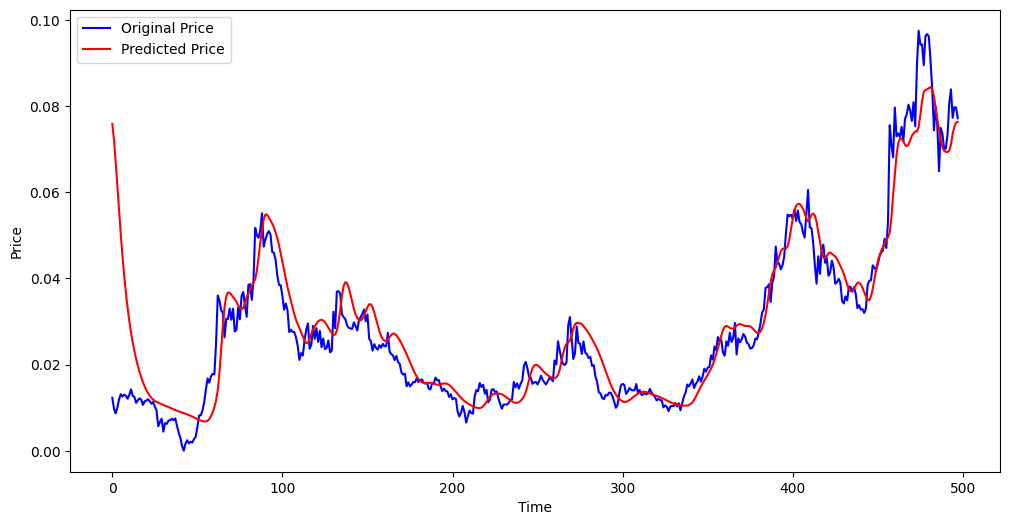

In [77]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()